# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**: ==> "I'd like to know the relationship between the degree of satisfaction of users, and locational advantages of each dock within the system."  

> **Tip**: If you double click on this cell, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options using a plain-text syntax. You will also use Markdown later in the Nanodegree program. Use **Shift** + **Enter** or **Shift** + **Return** to run the cell and show its rendered form.




<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by **looking at one entry from each of the cities we're going to analyze.** Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [1]:
## import all necessary packages and functions.
import csv # read and write csv files
import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

In [2]:
#there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the
#cities we're going to analyze. So This is a totally rubbish function that does not affect the result!

def print_first_point(filename):
    city = filename.split('-')[2].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    # extracting the first entry from the iterable dictionary...
    with open(filename, 'r') as f_in:
        trip_reader = csv.DictReader(f_in) 
        first_trip = next(trip_reader) # next() Return the next row of the reader’s iterable object as a list
        pprint(first_trip)             # list() Returns the all rows as lists 
    return (city, first_trip)                   

# list of filenames for each city
data_files = ['C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/NYC-CitiBike-2016.csv',
              'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/Chicago-Divvy-2016.csv',
              'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/Washington-CapitalBikeshare-2016.csv',]

# recreation of a dictionary-nesting dictionary..ie..'City' keys are newly introduced. 
example_trips = {}

for i in data_files:
    cit, ftrip = print_first_point(i) #******************* the output below comes form this line ! 
    example_trips[cit] = ftrip 
    #print(example_trips)

#example_trips['NYC']['tripduration']  

#Here, the output below is NOT from the examlple_trips {} ..but from print() and pprint() of the func(print_first_point)...


City: NYC
{'bikeid': '17109',
 'birth year': '',
 'end station id': '401',
 'end station latitude': '40.72019576',
 'end station longitude': '-73.98997825',
 'end station name': 'Allen St & Rivington St',
 'gender': '0',
 'start station id': '532',
 'start station latitude': '40.710451',
 'start station longitude': '-73.960876',
 'start station name': 'S 5 Pl & S 4 St',
 'starttime': '1/1/2016 00:09:55',
 'stoptime': '1/1/2016 00:23:54',
 'tripduration': '839',
 'usertype': 'Customer'}

City: Chicago
{'bikeid': '2295',
 'birthyear': '1990',
 'from_station_id': '156',
 'from_station_name': 'Clark St & Wellington Ave',
 'gender': 'Male',
 'starttime': '3/31/2016 23:30',
 'stoptime': '3/31/2016 23:46',
 'to_station_id': '166',
 'to_station_name': 'Ashland Ave & Wrightwood Ave',
 'trip_id': '9080545',
 'tripduration': '926',
 'usertype': 'Subscriber'}

City: Washington
{'Bike number': 'W20842',
 'Duration (ms)': '427387',
 'End date': '3/31/2016 23:04',
 'End station': 'Georgia Ave and Fa

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. **Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.**

You will generate new data files with five values of interest for each trip: 1)trip duration, 2)starting month, 3)starting hour, 4)day of the week, and 5)user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two. It also turns out that there are some trips in the New York city dataset that do not have an attached user type. Since we don't have enough information to fill these values in, just leave them as-is for now.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [3]:
def duration_in_mins(datum, city):
    if city=='Washington':
        dura_value = float(datum['Duration (ms)'])/60000
    else: 
        dura_value = float(datum['tripduration'])/60
    return dura_value

'''
# Some tests to check that your code works. There should be no output if all of
# the assertions pass. Little weird, but the `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files. .... 839/60, 926/60, 427387/60000 
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for i in tests:
    assert(abs(duration_in_mins(example_trips[i], i) - tests[i]) < 0.001)
    
#What's 'assert(condition)'? it returns error message if things are false. 
'''

"\n# Some tests to check that your code works. There should be no output if all of\n# the assertions pass. Little weird, but the `example_trips` dictionary was obtained from when\n# you printed the first trip from each of the original data files. .... 839/60, 926/60, 427387/60000 \ntests = {'NYC': 13.9833,\n         'Chicago': 15.4333,\n         'Washington': 7.1231}\n\nfor i in tests:\n    assert(abs(duration_in_mins(example_trips[i], i) - tests[i]) < 0.001)\n    \n#What's 'assert(condition)'? it returns error message if things are false. \n"

In [4]:
def time_of_trip(datum, city):
    if city=='Washington': 
        month,day,year = (int(x.replace(':','')) for x in datum['Start date'].split()[0].split('/')) #why? it's multiple values
        hour = int(datum['Start date'].split()[-1][:2].replace(':','')) #why? it's a single value 
        ans = datetime.date(year, month, day) #creating a datetime-object! [*in: int, *out: int] ==> "datetime.date(2016, 1, 1)"
        day_of_week = ans.strftime('%A') #calculating, using 'year,month,day'
    else:
        month,day,year = (int(x.replace(':','')) for x in datum['starttime'].split()[0].split('/'))
        hour = int(datum['starttime'].split()[-1][:2].replace(':','')) 
        ans = datetime.date(year, month, day)
        day_of_week = ans.strftime('%A')        
        
    return (month, hour, day_of_week)
'''
# Some tests to check that your code works. There should be no output if all of the assertions pass. 
# The `example_trips` dictionary was obtained from when you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for i in tests:
    assert(time_of_trip(example_trips[i], i) == tests[i])
'''

"\n# Some tests to check that your code works. There should be no output if all of the assertions pass. \n# The `example_trips` dictionary was obtained from when you printed the first trip from each of the original data files.\ntests = {'NYC': (1, 0, 'Friday'),\n         'Chicago': (3, 23, 'Thursday'),\n         'Washington': (3, 22, 'Thursday')}\n\nfor i in tests:\n    assert(time_of_trip(example_trips[i], i) == tests[i])\n"

In [5]:
def type_of_user(datum, city):
    if city == 'Washington':
        if datum['Member Type']=='Registered':
            user_type = 'Subscriber'
        else:
            user_type = 'Customer'
    else:
        user_type = datum['usertype']
    
    return user_type

'''
# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for i in tests:
    assert(type_of_user(example_trips[i], i) == tests[i])
'''

"\n# Some tests to check that your code works. There should be no output if all of\n# the assertions pass. The `example_trips` dictionary was obtained from when\n# you printed the first trip from each of the original data files.\ntests = {'NYC': 'Customer',\n         'Chicago': 'Subscriber',\n         'Washington': 'Subscriber'}\n\nfor i in tests:\n    assert(type_of_user(example_trips[i], i) == tests[i])\n"

**Question 3b**: Now, use the helper functions you wrote above to *create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [6]:
# Create the logic of summary files.

def condense_data(in_file, out_file, city): # why city? coz..each requires additional wrangling depending on the city..

    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        trip_writer = csv.DictWriter(f_out, fieldnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type'])
        trip_writer.writeheader() # .writeheader() ??? Write a row with the field names.
        
        ## TODO: set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)

        # collect data from the entire iterable dictionary and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed data point
            new_point = {}
            ## TODO: use the helper functions to get the 'cleaned data' from the original data dictionaries.
            ## Note that the keys for the new_point dictionary should match the column names set in the DictWriter object above. 
            new_point['duration'] = duration_in_mins(row, city)
            new_point['month'] = time_of_trip(row, city)[0]
            new_point['hour'] = time_of_trip(row, city)[1]
            new_point['day_of_week'] = time_of_trip(row, city)[2]
            new_point['user_type'] = type_of_user(row, city)
             
            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            trip_writer.writerow(new_point) # Write all rows of values..##what's the difference bw 'writerow() vs writerows()'??
            

In [7]:
# Create the summary files! THIS IS THE MOST IMPORTANT CELL IN THIS PROCESS !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

city_info = {'Washington': {'in_file': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/Chicago-Divvy-2016.csv',
                         'out_file': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/NYC-CitiBike-2016.csv',
                     'out_file': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/NYC-2016-Summary.csv'}}

# Multiple iterator => .itmes()' ? it returns a list For "dict's"? ..how about "enumerate()", Is it For a "dataframe" ? 
for k, v in city_info.items():
    condense_data(v['in_file'], v['out_file'], k)
    print_first_point(v['out_file']) #********************** the output below comes form this line - print() and pprint()

    
# Now we just achieve our main goal which is...to create 3 summary csv files!!!     


City: Chicago
{'day_of_week': 'Thursday',
 'duration': '15.433333333333334',
 'hour': '23',
 'month': '3',
 'user_type': 'Subscriber'}

City: Washington
{'day_of_week': 'Thursday',
 'duration': '7.123116666666666',
 'hour': '22',
 'month': '3',
 'user_type': 'Subscriber'}

City: NYC
{'day_of_week': 'Friday',
 'duration': '13.983333333333333',
 'hour': '0',
 'month': '1',
 'user_type': 'Customer'}


> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the "csv" module(package) to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: NYC has the highest number of trips!, NYC has the h.p.t by subscribers, Chicago has the h.p.t by customers

In [8]:
# Based on user_type, Compute the total number of subscriber / customer 
def number_of_trips(filename):
    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            elif row['user_type'] == 'Customer':
                n_customers += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        
        # return tallies as a tuple
        return(n_subscribers, n_customers, n_total, n_subscribers/n_total, n_customers/n_total)

In [9]:
data_file= {'Washington': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/Washington-2016-Summary.csv',
            'Chicago': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/Chicago-2016-Summary.csv',
            'NYC': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/NYC-2016-Summary.csv'}

for i in data_file:
    print(i, number_of_trips(data_file[i]))


Chicago (54982, 17149, 72131, 0.7622520136973008, 0.23774798630269925)
Washington (51753, 14573, 66326, 0.7802822422579381, 0.21971775774206193)
NYC (245896, 30185, 276081, 0.8906661450806104, 0.1093338549193896)


> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: AVG: {NYC:15.8, Chicago:18.9, Washington:16.6}, TRIP>30: {NYC:7.7%, Chicago:11.2%, Washington:8.7%} 

In [10]:
# Based on user_type, Compute the average trip length for each city, and the percentage of overage charges. 
## HINT: The csv module reads in all of the data as strings, including numeric values. 
## You will need a function to convert the strings into an appropriate numeric type before you aggregate data.

''' # watch out!!!!!!! wrong!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
def avg_trip_len(filename):
    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in)
        
        for row in reader:
            avg = sum(float(row['duration']))/len(row['duration'])
            over = sum((float(row['duration']))>30)/sum(float(row['duration']))
        return avg, over
'''

def avg_trip_len(filename):
    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in)
        x = [] #well...when you count things, starting with a list first? 
        for row in reader:
            x.append(int(round(float(row['duration'].replace(':','')))))
        avg = sum(x)/len(x)
        #How to count "certain cond" in a list? any idea?? 
        n = 0
        for i in x:
            if i>=30:
                n+=1
            else: 
                n+=0
        over = (n/len(x))*100
        
        return(avg, over)


In [11]:
data_file= {'Washington': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/Washington-2016-Summary.csv',
            'Chicago': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/Chicago-2016-Summary.csv',
            'NYC': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/NYC-2016-Summary.csv'}

for i in data_file:
    print(i, avg_trip_len(data_file[i]))


Chicago (16.563724334890686, 8.765995203172007)
Washington (18.932108072249193, 11.191689533516268)
NYC (15.813466860309685, 7.7175413117146805)


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: in NYC, customer with 32.7 / in Chicago, customer with 41.7 / in Washington, customer with 31

In [12]:
# Based on user_type, returns the average duration 

def pivot(filename):
    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in)
        s = []
        c = []
        for row in reader:
            if row['user_type']=='Subscriber':
                s.append(int(round(float(row['duration'].replace(':','')))))
            else:
                c.append(int(round(float(row['duration'].replace(':','')))))
        return (sum(s)/len(s), sum(c)/len(c))


In [13]:
data_file= {'Washington': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/Washington-2016-Summary.csv',
            'Chicago': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/Chicago-2016-Summary.csv',
            'NYC': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/NYC-2016-Summary.csv'}

for i in data_file:
    print(i, pivot(data_file[i]))


Chicago (12.067440253173766, 30.97941570937081)
Washington (12.527563619500318, 41.67652508062856)
NYC (13.681670299638872, 32.77677820205812)


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

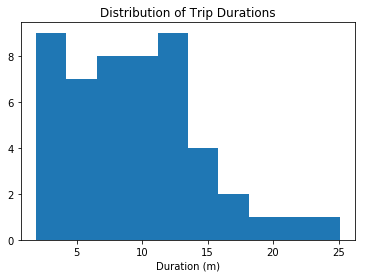

In [14]:
# load library
import matplotlib.pyplot as plt
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

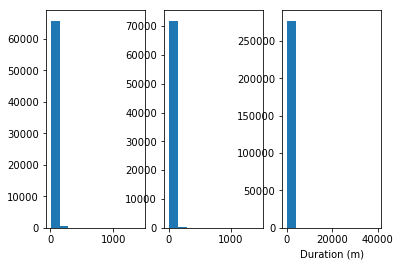

In [15]:
# collect all of the trip times as a list and then generate a histogram of trip times.  
def triplist(filename):
    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in)
        ll = []
        for row in reader:
            ll.append(int(round(float(row['duration'].replace(':','')))))
        return (ll)
    
data_file= {'Washington': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/Washington-2016-Summary.csv',
            'Chicago': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/Chicago-2016-Summary.csv',
            'NYC': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/NYC-2016-Summary.csv'}

'''
for i in data_file:
    plt.hist(triplist(data_file[i]))   # plotting from a list..not a dataframe.. and hard to layout? 
    plt.title('Distribution of Trip Durations: {}'.format(i))
    plt.xlabel('Duration (m)')
    plt.show()
'''

f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.hist(triplist(data_file['Washington']))
ax2.hist(triplist(data_file['Chicago']))
ax3.hist(triplist(data_file['NYC']))
plt.xlabel('Duration (m)')
plt.show()


If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. **This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted.** Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. **Add limits to the plots so that only trips of duration less than 75 minutes are plotted.** As a bonus, set the plots up so that **bars are in five-minute wide intervals.** For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: in Subscriber-group, dist: Exponential(skewed to the right), 5~10 min duration is the most frequently observable. in Customer-group, dist: Poisson(skewed to the right), 20~25 min is.   

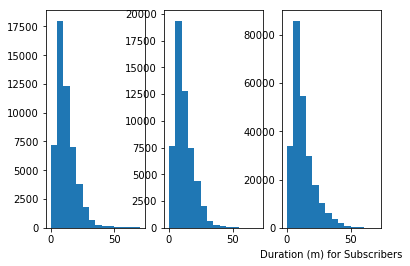

In [16]:
# for only the Subscriber. 

def triplist_s(filename):
    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in)
        ll = []
        for row in reader:
            if row['user_type']=='Subscriber':
                ll.append(int(round(float(row['duration'].replace(':','')))))
        return (ll)

data_file= {'Washington': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/Washington-2016-Summary.csv',
            'Chicago': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/Chicago-2016-Summary.csv',
            'NYC': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/NYC-2016-Summary.csv'}

'''
for i in data_file:
    plt.hist(triplist_s(data_file[i]), bins= range(0, 75, 5)) #bins argument accepts a list! 
    plt.title('Distribution of Trip Durations: {}'.format(i))
    plt.xlabel('Duration (m) for Subscribers')
    plt.show()
'''    

f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.hist(triplist_s(data_file['Washington']), bins=range(0, 75, 5))
ax2.hist(triplist_s(data_file['Chicago']), bins=range(0, 75, 5))
ax3.hist(triplist_s(data_file['NYC']), bins=range(0, 75, 5))
plt.xlabel('Duration (m) for Subscribers')
plt.show()


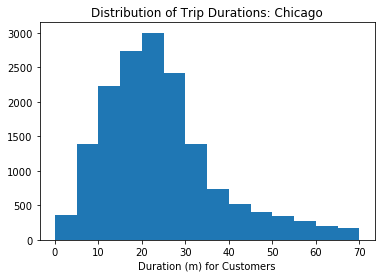

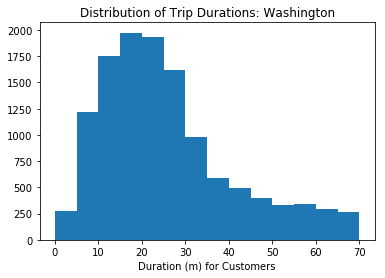

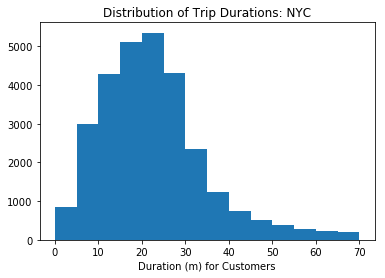

In [17]:
# for only the Subscriber. 

def triplist_c(filename):
    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in)
        ll = []
        for row in reader:
            if row['user_type']=='Customer':
                ll.append(int(round(float(row['duration'].replace(':','')))))
        return (ll)

data_file= {'Washington': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/Washington-2016-Summary.csv',
            'Chicago': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/Chicago-2016-Summary.csv',
            'NYC': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/NYC-2016-Summary.csv'}

for i in data_file:
    plt.hist(triplist_c(data_file[i]), bins = range(0, 75, 5)) #bins argument accepts a list!
    plt.title('Distribution of Trip Durations: {}'.format(i))
    plt.xlabel('Duration (m) for Customers')
    plt.show()
    

In [ ]:
# wtf ? 
'''
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.hist(data1)
ax2.hist(data2)
ax3.hist(data3)
plt.show()
'''
'''
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline 

data1 = sample(range(1, 1000), 100); data1 #a list of 100 entries..histogram shows how many each entry appears. 
data2 = sample(range(1, 1000), 100); data2
data3 = sample(range(1, 1000), 100); data3

plt.figure()

plt.subplot(1,3,1)
plt.hist(data1)
plt.show()

plt.subplot(1,3,2)
plt.hist(data2)
plt.show()

plt.subplot(1,3,3)
plt.hist(data3)
plt.show()
'''

In [ ]:
#data1

<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? 
- Which month / season has the highest ridership? 
- Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? 
- On what days are Subscribers most likely to use the system? What about Customers? 
- Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? 
- Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**: Replace this text with your responses and include a visualization below!

In [18]:
#duration
def dur(datum, city):
    if city=='Washington':
        dura_value = float(datum['Duration (ms)'])/60000
    else: 
        dura_value = float(datum['tripduration'])/60
    return(dura_value)

#dur(all_trips['NYC'], 'NYC')
#dur(all_trips['Chicago'], 'Chicago')
#dur(all_trips['Washington'], 'Washington')

In [19]:
#usertype
def user(datum, city):
    if city == 'Washington':
        if datum['Member Type']=='Registered':
            user_type = 'Subscriber'
        else:
            user_type = 'Customer'
    else:
        user_type = datum['usertype']
    return(user_type)

#user(all_trips['NYC'], 'NYC')
#user(all_trips['Chicago'], 'Chicago')
#user(all_trips['Washington'], 'Washington')

In [20]:
#day of week
def day(datum, city):
    if city=='Washington': 
        month,day,year = (int(x.replace(':','')) for x in datum['Start date'].split()[0].split('/')) 
        ans = datetime.date(year, month, day) #creating a datetime-object! [*in: int, *out: int] ==> "datetime.date(2016, 1, 1)"
        day_of_week = ans.strftime('%A') #calculating, using 'year,month,day'
    else:
        month,day,year = (int(x.replace(':','')) for x in datum['starttime'].split()[0].split('/'))
        ans = datetime.date(year, month, day)
        day_of_week = ans.strftime('%A')        
    return(day_of_week)

#day(all_trips['NYC'], 'NYC')
#day(all_trips['Chicago'], 'Chicago')
#day(all_trips['Washington'], 'Washington')

In [21]:
# Create the logic of summary files.

def condense_data_2(in_file, out_file, city): 
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        trip_writer = csv.DictWriter(f_out, fieldnames = ['duration', 'day_of_week', 'user_type'])
        trip_writer.writeheader()
        trip_reader = csv.DictReader(f_in)

        for row in trip_reader:
            new_point = {}
            new_point['duration'] = dur(row, city)
            new_point['day_of_week'] = day(row, city)
            new_point['user_type'] = user(row, city)
             
            trip_writer.writerow(new_point)


In [22]:
# Create the summary files!

city_info = {'Washington': {'in_file': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/Chicago-Divvy-2016.csv',
                         'out_file': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/NYC-CitiBike-2016.csv',
                     'out_file': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/NYC-2016-Summary.csv'}}

for k, v in city_info.items():
    condense_data_2(v['in_file'], v['out_file'], k)


In [23]:
################################################################################################################################
################################################################################################################################
# Here, our analysis begins in earnest, buckling down to it! # Now the filename is our 'new summary' files! 

# Based on day_of_week, Compute the total number of subscriber + customer 
def day_trips_1(filename):
    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in)
        
        n_M = 0
        n_T = 0
        n_W = 0
        n_TH = 0
        n_F = 0
        n_SA = 0
        n_SN = 0
        
        for row in reader:
            if row['day_of_week'] == 'Monday':
                n_M += 1
            elif row['day_of_week'] == 'Tuesday':
                n_T += 1
            elif row['day_of_week'] == 'Wednesday':
                n_W += 1
            elif row['day_of_week'] == 'Thursday':
                n_TH += 1
            elif row['day_of_week'] == 'Friday':
                n_F += 1
            elif row['day_of_week'] == 'Saturday':
                n_SA += 1
            elif row['day_of_week'] == 'Sunday':
                n_SN += 1
        
        n_total = n_M + n_T + n_W + n_TH + n_F + n_SA + n_SN
        
        return(n_M, n_T, n_W, n_TH, n_F, n_SA, n_SN, n_total)


In [24]:
data_file= {'Washington': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/Washington-2016-Summary.csv',
            'Chicago': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/Chicago-2016-Summary.csv',
            'NYC': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/NYC-2016-Summary.csv'}

for i in data_file:
    print(i, day_trips_1(data_file[i]))

Chicago (11286, 10911, 9604, 10008, 10741, 9927, 9654, 72131)
Washington (9394, 9748, 10103, 9984, 9970, 8900, 8227, 66326)
NYC (39340, 42405, 44629, 44330, 41389, 33353, 31352, 276798)


In [25]:
# Based on user_type, print the total duration by day_of_week !

#For Subscriber
def day_trips_2_s(filename):
    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in)
        M = []
        T = []
        W = []
        TH = []
        F = []
        SA = []
        SN = []
        
        for row in reader:
            if row['user_type']=='Subscriber':
                if row['day_of_week']=='Monday':
                    M.append(int(round(float(row['duration'].replace(':','')))))
                elif row['day_of_week']=='Tuesday':
                    T.append(int(round(float(row['duration'].replace(':','')))))
                elif row['day_of_week']=='Wednesday':
                    W.append(int(round(float(row['duration'].replace(':','')))))
                elif row['day_of_week']=='Thursday':
                    TH.append(int(round(float(row['duration'].replace(':','')))))
                elif row['day_of_week']=='Friday':
                    F.append(int(round(float(row['duration'].replace(':','')))))
                elif row['day_of_week']=='Saturday':
                    SA.append(int(round(float(row['duration'].replace(':','')))))
                elif row['day_of_week']=='Sunday':
                    SN.append(int(round(float(row['duration'].replace(':','')))))
        return (sum(M), sum(T), sum(W), sum(TH), sum(F), sum(SA), sum(SN))

    
#For Customer
def day_trips_2_c(filename):
    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in)
        M = []
        T = []
        W = []
        TH = []
        F = []
        SA = []
        SN = []
        
        for row in reader:
            if row['user_type']=='Customer':
                if row['day_of_week']=='Monday':
                    M.append(int(round(float(row['duration'].replace(':','')))))
                elif row['day_of_week']=='Tuesday':
                    T.append(int(round(float(row['duration'].replace(':','')))))
                elif row['day_of_week']=='Wednesday':
                    W.append(int(round(float(row['duration'].replace(':','')))))
                elif row['day_of_week']=='Thursday':
                    TH.append(int(round(float(row['duration'].replace(':','')))))
                elif row['day_of_week']=='Friday':
                    F.append(int(round(float(row['duration'].replace(':','')))))
                elif row['day_of_week']=='Saturday':
                    SA.append(int(round(float(row['duration'].replace(':','')))))
                elif row['day_of_week']=='Sunday':
                    SN.append(int(round(float(row['duration'].replace(':','')))))
        return (sum(M), sum(T), sum(W), sum(TH), sum(F), sum(SA), sum(SN))    

In [26]:
data_file= {'Washington': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/Washington-2016-Summary.csv',
            'Chicago': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/Chicago-2016-Summary.csv',
            'NYC': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/NYC-2016-Summary.csv'}

for i in data_file:
    print(i, day_trips_2_s(data_file[i])) # for subscriber
    
for i in data_file:
    print(i, day_trips_2_c(data_file[i])) # for customer

Chicago (107260, 107721, 101987, 99234, 101375, 74831, 71084)
Washington (94274, 103103, 107015, 105874, 96835, 73180, 68058)
NYC (470472, 509622, 545324, 547415, 540074, 387417, 363944)
Chicago (74642, 48232, 36904, 40229, 65936, 129981, 135342)
Washington (70746, 59558, 57552, 60700, 81946, 147628, 129222)
NYC (120377, 94771, 106525, 96223, 120299, 234779, 222606)


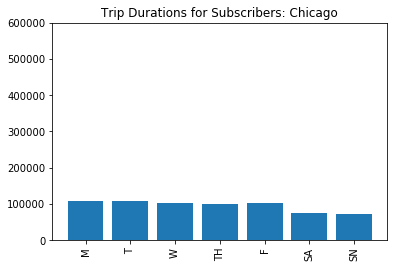

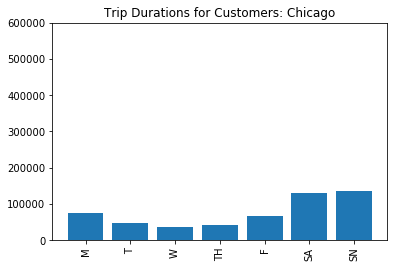

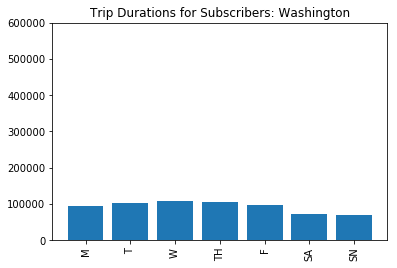

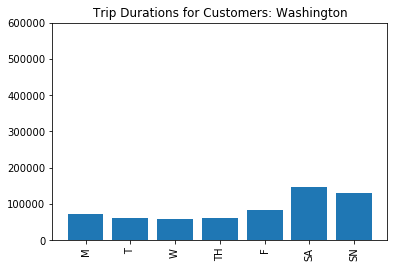

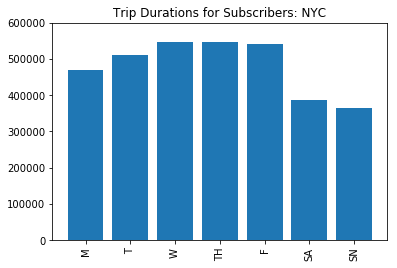

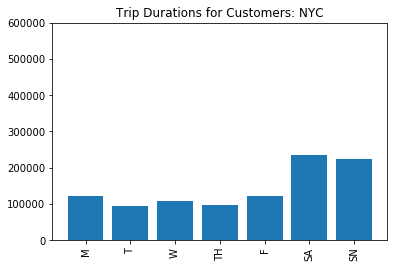

In [27]:
#Plotting
# collect sum of duration as a list and then generate a histogram.  

data_file= {'Washington': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/Washington-2016-Summary.csv',
            'Chicago': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/Chicago-2016-Summary.csv',
            'NYC': 'C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L2/bike-share-analysis/data/NYC-2016-Summary.csv'}

'''
for i in data_file:
    f, (ax1, ax2, ax3) = plt.subplots(1, 3)
    labels = ['M', 'T', 'W', 'TH', 'F', 'SA', 'SN']
    
    data1 = day_trips_2_s(data_file['Washington'])
    data2 = day_trips_2_s(data_file['Chicago'])
    data3 = day_trips_2_s(data_file['NYC'])
    
    ax1.bar(range(len(data1)), data1, align='center')
    plt.xticks(range(len(data1)), labels, rotation='vertical')
    plt.ylim(ymax = 600000)
    plt.title('Trip Durations for Subscribers: {}'.format(i))
    
    ax2.bar(range(len(data2)), data2, align='center')
    plt.xticks(range(len(data2)), labels, rotation='vertical')
    plt.ylim(ymax = 600000)
    plt.title('Trip Durations for Subscribers: {}'.format(i))
    
    ax3.bar(range(len(data3)), data3, align='center')
    plt.xticks(range(len(data3)), labels, rotation='vertical')
    plt.ylim(ymax = 600000)
    plt.title('Trip Durations for Subscribers: {}'.format(i))
    
    plt.show()    
'''


for i in data_file:
    data = day_trips_2_s(data_file[i])
    labels = ['M', 'T', 'W', 'TH', 'F', 'SA', 'SN']
    plt.bar(range(len(data)), data, align='center') # x is a range..y is the data...
    plt.ylim(ymax = 600000)
    plt.xticks(range(len(data)), labels, rotation='vertical')
    plt.title('Trip Durations for Subscribers: {}'.format(i))
    plt.show()
    
    data2 = day_trips_2_c(data_file[i])
    labels = ['M', 'T', 'W', 'TH', 'F', 'SA', 'SN']
    plt.bar(range(len(data)), data2, align='center') # x is a range..y is the data...
    plt.ylim(ymax = 600000)
    plt.xticks(range(len(data)), labels, rotation='vertical')
    plt.title('Trip Durations for Customers: {}'.format(i))
    plt.show()
    
    

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. 

For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: I'd like to investigate how urban landuse pattern has changed over time and what have affected those changes. And we would be able to learn how to predict the urban transformation by this analysis.  

> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.